# Part 1 - PROBLEM DEFINITION AND CONTEXT


### ---- Data Source and Notes ----
Data source: https://www.kaggle.com/johnsmith88/heart-disease-dataset/version/2

Data column dictionary:

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

### ---- Import Libraries for Project ----


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.inspection import permutation_importance

## Part 2 - Data Preparation And Exploration

### ---- Load Data ----


In [4]:
heart_disease_data = pd.read_csv("./heart.csv")

In [29]:
#use the head method to get a glimpse of the data structure before moving forward
heart_disease_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
867,41,1,1,110,235,0,1,153,0,0.0,2,0,2,1
533,53,0,0,138,234,0,0,160,0,0.0,2,0,2,1
1004,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
127,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1


### ---- Clean Data ----


First, I will check whether there are any missing values in any of the data rows.

In [5]:
heart_disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


The above table shows that there are no null values in the dataset, so nulls do not have to be removed/infilled.

Next I will view the description of the dataset. In the data description, the data uploader indicates that certain variables are boolean, some range for 0-3, and others like age have some common limits like age not being negative. I will use this data and check data ranges to make sure data is within proper bounds.

In [18]:
heart_disease_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [20]:
heart_disease_data["sex"].unique()

array([0, 1], dtype=int64)

In [21]:
heart_disease_data["cp"].unique()

array([1, 0, 2, 3], dtype=int64)

In [24]:
heart_disease_data["fbs"].unique()

array([0, 1], dtype=int64)

In [25]:
heart_disease_data["restecg"].unique()

array([1, 0, 2], dtype=int64)

In [26]:
heart_disease_data["exang"].unique()

array([0, 1], dtype=int64)

In [27]:
heart_disease_data["thal"].unique()

array([2, 3, 1, 0], dtype=int64)

Looking at the data, it appears that all columns have data within reasonable limits and no corrections need to be made.

Next I will shuffle the data, according to the target variable, to help randomize distribution into train and test data sets.

In [9]:
#shuffle data, to ensure that target variable rows are randomly dispersed. This may help when splitting into 
#test and train sets

heart_disease_data = shuffle(heart_disease_data,random_state=42)

I will also check the distribution of the target variable in the data. If data is imbalanced, we may need to take additional steps in our analysis to account for this.

In [10]:
#Check the distribution of the target variable in this data. If the target is imbalanced, additional steps may 
#need to be taken accordingly

heart_disease_data['target'].value_counts(normalize=True)

1    0.513171
0    0.486829
Name: target, dtype: float64

According to the above calculation, the target variable distribution in this data is roughly a 50/50 split between the 0 and 1 value. Since there isn't a clear imbalance, we can proceed without additional measures.

### ---- Explore the data (EDA) ----

In this classification task, I want to search for correlations between variables and especially with the target variable. To do so I will use a heatmap and correlation matrix.

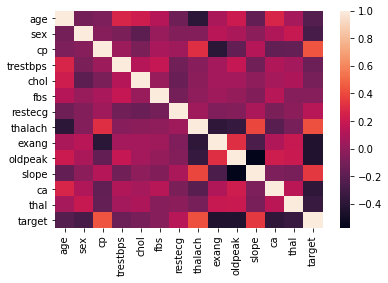

In [38]:
sns.heatmap(heart_disease_data.corr());

In the correlation matrix / heat map, I see that there may be correlations bewteen the target variable and the age, sex, exang, oldpeak, ca and thal variables. At this point I cannot discount any variables yet, but it is helpful to keep these in mind going forward.

### ---- Hypothesize a Solution ----

In the next parts of this analysis, I will attempt to classify the given data points and predict whether a given patient has heart disease. To do so, I will test three models:

1. Random Forest Classifier
2. KNN Classifier
3. Logistic Regression Classifier

# Part 3 Develop a Model

### ---- Split Data For Models ----


In [42]:
X=heart_disease_data.drop('target',axis=1)
y=heart_disease_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)


### ---- Create Models ----


#### ---- Random Forest Model ----


In [ ]:
random_forest_clf = RandomForestClassifier(random_state=42,n_estimators=500,max_features=5)

#### ---- KNN Model ----


In [ ]:
knn_clf = KNeighborsClassifier()

#### ---- Logistic Model ----


In [ ]:
logistic_clf = LogisticRegression(random_state=42,max_iter=1000)

### ---- 9 Test models ----

### ---- 10 Select best model  ----


## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----


### ---- 12 Deploy solution ----
